In [ ]:
import pandas as pan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:

uploaded = files.upload()

# Load the dataset
df = pan.read_csv('student_performance_dataset.csv')

data = {col :df[col].tolist() for col in df.columns}

dataset = pan.DataFrame(data)
print(dataset)

Saving student_performance_dataset.csv to student_performance_dataset (1).csv
     student_id  study_hours  attendance_percentage  class_participation  \
0         31116         15.3                   86.1                 10.0   
1        427908         22.1                   66.2                  5.0   
2        543490         18.8                   70.9                  5.8   
3        854786         17.4                   81.1                  5.5   
4        429844         16.0                   90.3                  8.5   
..          ...          ...                    ...                  ...   
995      391399          0.0                   81.3                  6.3   
996      266758          5.2                   68.1                  6.5   
997      674732          1.3                   71.5                  6.1   
998      770564          5.3                   94.5                  6.4   
999      712703          0.0                   95.1                  6.8   

     tota

In [ ]:
# Explore the data
print(dataset.info())
print(dataset.describe())

# The factors that most relate to grade are : total_score , study_hours

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             1000 non-null   int64  
 1   study_hours            1000 non-null   float64
 2   attendance_percentage  1000 non-null   float64
 3   class_participation    1000 non-null   float64
 4   total_score            1000 non-null   float64
 5   grade                  1000 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 47.0+ KB
None
          student_id  study_hours  attendance_percentage  class_participation  \
count    1000.000000  1000.000000            1000.000000          1000.000000   
mean   517778.313000     8.795900              84.590000             5.951300   
std    296995.873909     7.370229               9.589564             1.914483   
min       999.000000     0.000000              52.300000             0.000000   
25%   

In [ ]:
# Analyze relationships

print("Pandas mean:\n", df.mean(numeric_only=True))
print("Pandas median:\n", df.median(numeric_only=True))


print("Numpy mean:\n", np.mean(df.select_dtypes('number'), axis=0))
print("Numpy median:\n", np.median(df.select_dtypes('number'), axis=0))


grade_map = {g: i for i, g in enumerate(sorted(df['grade'].unique()))}
df['grade_encoded'] = df['grade'].map(grade_map)


print("Pandas correlation matrix:\n", df.corr(numeric_only=True))

Pandas mean:
 student_id               517778.3130
study_hours                   8.7959
attendance_percentage        84.5900
class_participation           5.9513
total_score                  64.3209
dtype: float64
Pandas median:
 student_id               539766.00
study_hours                   7.75
attendance_percentage        85.05
class_participation           5.90
total_score                  63.35
dtype: float64
Numpy mean:
 student_id               517778.3130
study_hours                   8.7959
attendance_percentage        84.5900
class_participation           5.9513
total_score                  64.3209
dtype: float64
Numpy median:
 [5.39766e+05 7.75000e+00 8.50500e+01 5.90000e+00 6.33500e+01]
Pandas correlation matrix:
                        student_id  study_hours  attendance_percentage  \
student_id               1.000000    -0.062921               0.042903   
study_hours             -0.062921     1.000000              -0.060475   
attendance_percentage    0.042903    -0.060

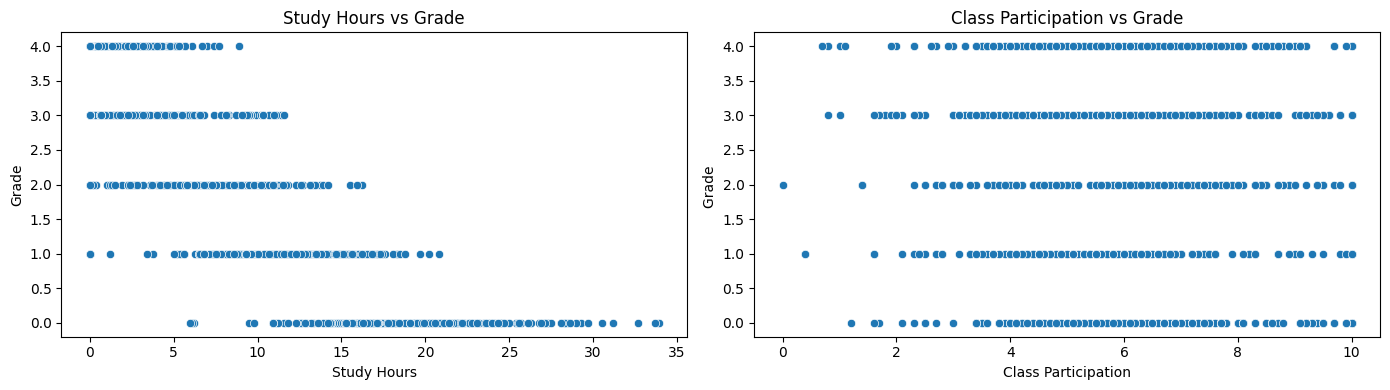

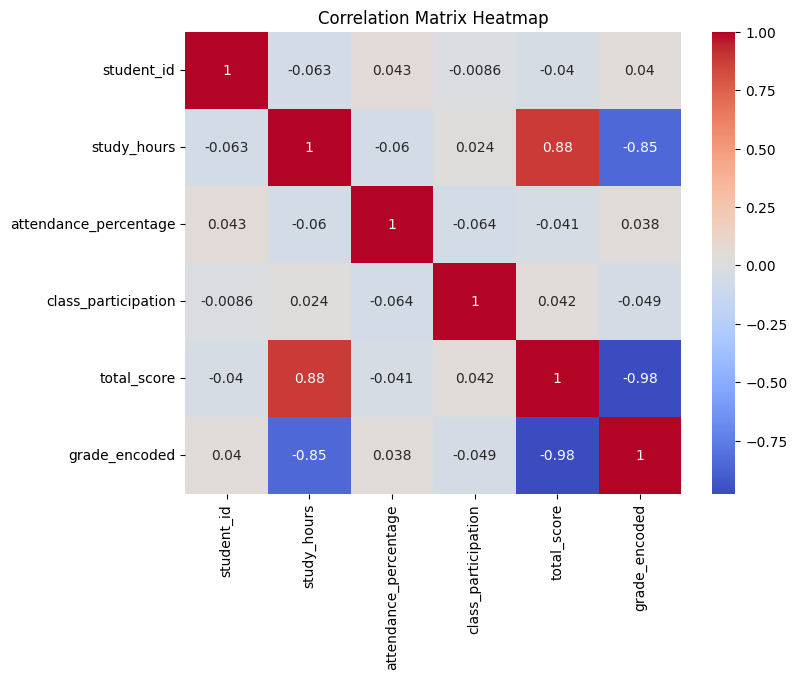

In [ ]:
# Visualize
plt.figure(figsize=(14, 4))

plt.subplot(1 ,2, 1)
sns.scatterplot(x='study_hours' ,y='grade_encoded' ,data=df)
plt.xlabel('Study Hours')
plt.ylabel('Grade')
plt.title('Study Hours vs Grade')

plt.subplot(1, 2, 2)
sns.scatterplot(x='class_participation' ,y='grade_encoded' ,data=df)
plt.xlabel('Class Participation')
plt.ylabel('Grade ')
plt.title('Class Participation vs Grade')

plt.tight_layout()
plt.show()

corr = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr , annot=True ,cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Observations :\
1-Numpy & Pandas gives the same results for mean and median but pandas synthax is much easier and in numpy , it returns the median values in a list \
2-The features that seems to influence grades the most are : total_score & study_hours (more the total_score and study_hours grow more the student get good grade) and that is shown in the heatmap (total_score corr coef =-0.98 & study_score corr coef =-0.85) its a negative correlation (when the total_score & study_hours grow the grade drop from 4 to 0 (encoded from 'F' to 'A'))